# 1-7 미니 프로젝트 : 가위바위보 분류기를 만들자

## 1) 데이터를 준비하자

(참고)사진 데이터 만들기[Teachable Machine](https://teachablemachine.withgoogle.com/)

In [ ]:
# 바위 사진 압축 풀기

# 경로 설정

# 압축 풀기
!unzip "/content/drive/MyDrive/실습_가위바위보/rock/rock.zip"

Archive:  /content/drive/MyDrive/실습_가위바위보/rock/rock.zip
replace 0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: 0.jpg                   
 extracting: 1.jpg                   
 extracting: 2.jpg                   
 extracting: 3.jpg                   
 extracting: 4.jpg                   
 extracting: 5.jpg                   
 extracting: 6.jpg                   
 extracting: 7.jpg                   
 extracting: 8.jpg                   
 extracting: 9.jpg                   
 extracting: 10.jpg                  
 extracting: 11.jpg                  
 extracting: 12.jpg                  
 extracting: 13.jpg                  
 extracting: 14.jpg                  
 extracting: 15.jpg                  
 extracting: 16.jpg                  
 extracting: 17.jpg                  
 extracting: 18.jpg                  
 extracting: 19.jpg                  
 extracting: 20.jpg                  
 extracting: 21.jpg                  
 extracting: 22.jpg                  
 extra

In [ ]:
# 보 사진 압축 풀기

# 디렉터리 이동
! cd /content/drive/MyDrive/실습_가위바위보/paper

# 압축 풀기
! unzip -qq "/content/drive/MyDrive/실습_가위바위보/paper/paper.zip"

replace 0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# 가위 사진 압축 풀기

# 디렉터리 이동
! cd "/content/drive/MyDrive/실습_가위바위보/scissor"

# 압축 풀기
! unzip -qq "/content/drive/MyDrive/실습_가위바위보/scissor/scissor.zip"

replace 0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
# 데이터 불러오기 + Resize 하기

from PIL import Image
import glob
print("PIL 라이브러리 import 완료!")


def resize_images(img_path):
  images = glob.glob(img_path + "/*.jpg")

  print(len(images), " images to be resized")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
  target_size=(28,28)
  for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    
  print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/실습_가위바위보/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/실습_가위바위보/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/실습_가위바위보/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized
100  images resized.
가위 이미지 resize 완료!
100  images to be resized
100  images resized.
바위 이미지 resize 완료!
100  images to be resized
100  images resized.
보 이미지 resize 완료!


In [ ]:
# 가위바위보 데이터를 읽는 함수 만들기 : load_data()

import numpy as np

def load_data(img_path, number_or_data = 300) : 
  # 가위:0, 바위:1, 보:2
  img_size = 28
  color = 3
  #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
  imgs = np.zeros(number_or_data * img_size * img_size * color, dtype = np.int32).reshape(number_or_data, img_size,img_size, color)
  labels = np.zeros(number_or_data, dtype=np.int32)

  idx = 0
  for file in glob.iglob(img_path +'/scissor/*.jpg') :
    img = np.array(Image.open(file),dtype = np.int32)
    imgs[idx, :, :, :] = img        # 데이터 영역에 이미지 행렬을 복사
    labels[idx] = 0     # 가위 : 0
    idx = idx +1

  for file in glob.iglob(img_path +'/rock/*.jpg') :
    img = np.array(Image.open(file),dtype = np.int32)
    imgs[idx, :, :, :] = img        # 데이터 영역에 이미지 행렬을 복사
    labels[idx] = 1     # 바위 : 0
    idx = idx +1

  for file in glob.iglob(img_path +'/paper/*.jpg') :
    img = np.array(Image.open(file),dtype = np.int32)
    imgs[idx, :, :, :] = img        # 데이터 영역에 이미지 행렬을 복사
    labels[idx] = 0     # 보 : 2
    idx = idx +1

  print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
  return imgs, labels


image_dir_path = "/content/drive/MyDrive/실습_가위바위보"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255        # 0-1값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train_shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train_shape: (300,)


라벨:  1


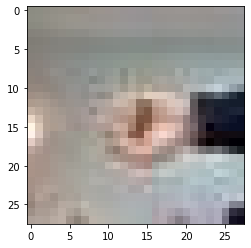

In [ ]:
# 이미지 부르기

plt.imshow(x_train[111])
print('라벨: ', y_train[111])

## 딥러닝 네트워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수 : ', len(model.layers))

Model에 추가된 Layer 개수 :  7


In [ ]:
# 네트워크 모델 확인

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 800)               0         
                                                                 
 dense_18 (Dense)            (None, 32)               

## 딥러닝 네트워크 학습시키기


In [ ]:
# 채널수 설정하기는 생략가능?

# 네트워크 학습

model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# epochs = 10은 300개의 데이터를 10번 반복 사용해서 학습시키라는 뜻
model.fit(x_train_norm, y_train, epochs = 10)

Epoch 1/10
10/10 [==============================] - 1s 18ms/step - loss: 0.9794 - accuracy: 0.5900
Epoch 2/10
10/10 [==============================] - 0s 19ms/step - loss: 0.7030 - accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 0.6401 - accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 18ms/step - loss: 0.6335 - accuracy: 0.7267
Epoch 5/10
10/10 [==============================] - 0s 19ms/step - loss: 0.6240 - accuracy: 0.7100
Epoch 6/10
10/10 [==============================] - 0s 17ms/step - loss: 0.5822 - accuracy: 0.7133
Epoch 7/10
10/10 [==============================] - 0s 17ms/step - loss: 0.5801 - accuracy: 0.7367
Epoch 8/10
10/10 [==============================] - 0s 18ms/step - loss: 0.5622 - accuracy: 0.7267
Epoch 9/10
10/10 [==============================] - 0s 19ms/step - loss: 0.5300 - accuracy: 0.7867
Epoch 10/10
10/10 [==============================] - 0s 19ms/step - loss: 0.4969 - accuracy: 0.7800


## 얼마나 잘 만들었는지 확인하기(테스트)

In [ ]:
# 테스트 이미지 사이즈 변경

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/실습_가위바위보_테스트/scissor"
resize_images(image_dir_path2)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/실습_가위바위보_테스트/rock"
resize_images(image_dir_path2)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path2 = "/content/drive/MyDrive/실습_가위바위보_테스트/paper"
resize_images(image_dir_path2)


100  images to be resized
100  images resized.
100  images to be resized
100  images resized.
100  images to be resized
100  images resized.


In [ ]:
# 테스트 데이터 불러오기

image_dir_path2 = "/content/drive/MyDrive/실습_가위바위보_테스트"
(x_test, y_test) = load_data(image_dir_path2)
x_test_norm = x_test/255        # 0-1값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test_shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test_shape: (300,)


In [ ]:
# 테스트 데이터로 모델 성능 확인 : model.evaluate()

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print('test_loss: {}'.format(test_loss))
print('test_accuracy: {}'.format(test_accuracy))

10/10 - 0s - loss: 0.9108 - accuracy: 0.6667 - 167ms/epoch - 17ms/step
test_loss: 0.910794198513031
test_accuracy: 0.6666666865348816
